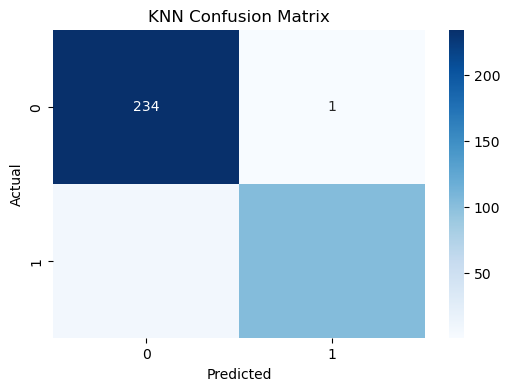

KNN Model
Accuracy: 0.9739884393063584
Confusion Matrix:
[[234   1]
 [  8 103]]



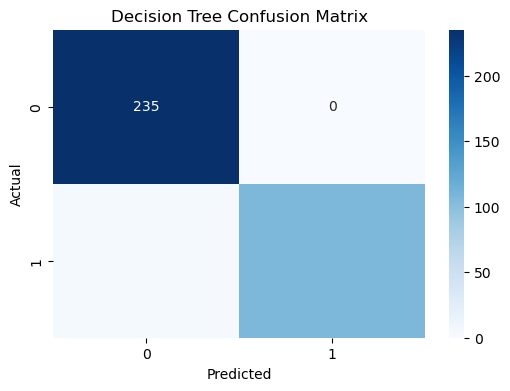

Decision Tree Model
Accuracy: 0.9884393063583815
Confusion Matrix:
[[235   0]
 [  4 107]]



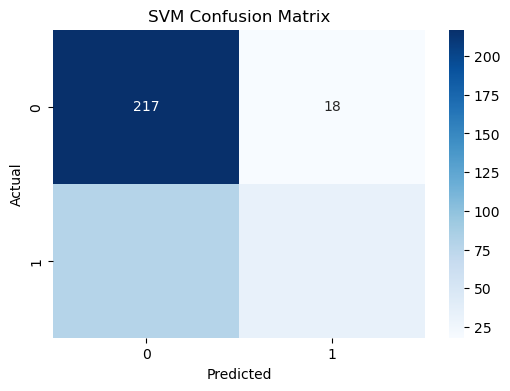

SVM Model
Accuracy: 0.7225433526011561
Confusion Matrix:
[[217  18]
 [ 78  33]]



In [2]:
import pandas as pd
import pickle
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv(r"C:\Users\hp\Downloads\car_evaluationmodi.csv")

# Remove leading and trailing spaces from column names and values
df.columns = df.columns.str.strip()
for column in df.columns:
    df[column] = df[column].str.strip()

# Encode categorical variables
encoders = {
    'buying_price': LabelEncoder(),
    'maint_cost': LabelEncoder(),
    'doors': LabelEncoder(),
    'persons': LabelEncoder(),
    'lug_boot': LabelEncoder(),
    'safety': LabelEncoder()
}

for column, encoder in encoders.items():
    df[column] = encoder.fit_transform(df[column])

# Encode 'decision' column: "unacc" -> 0, all others -> 1
df['decision'] = df['decision'].apply(lambda x: 0 if x == 'unacc' else 1)

# Split data into features and target
X = df.drop('decision', axis=1)
y = df['decision']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train models
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_scaled, y_train)

# Save the models and scaler
with open('trained_model_knn.pkl', 'wb') as model_file:
    pickle.dump(knn, model_file)
with open('trained_model_dt.pkl', 'wb') as model_file:
    pickle.dump(dt, model_file)
with open('trained_model_svm.pkl', 'wb') as model_file:
    pickle.dump(svm, model_file)
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

# Save the encoders
for column, encoder in encoders.items():
    with open(f'le_{column}.pkl', 'wb') as file:
        pickle.dump(encoder, file)

# Evaluate models and plot confusion matrices
models = {
    'KNN': knn,
    'Decision Tree': dt,
    'SVM': svm
}

for model_name, model in models.items():
    # Evaluate model
    y_pred = model.predict(X_test_scaled if model_name != 'Decision Tree' else X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} Confusion Matrix")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
 
    # Display evaluation metrics
    print(f"{model_name} Model")
    print(f"Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{cm}\n")
